# Основные понятия статистики

Начнем знакомство с математической статистикой, разберем основные понятия - выборка, генеральная совокупность, метрики. И поработаем с базовыми показателями, необходимыми для проведения разведочного анализа данных - среднее, медиана, дисперсия, квартили.

**Мода (mode)** – значение измеряемого признака, которое встречается максимально часто. Мод может быть несколько.

    import pandas as pd
    df.column_1.mode()  
    
либо

    from scipy import stats
    stats.mode(df.column_1)  

**Медиана (median)** – значение признака, которое делит упорядоченное множество данных пополам. 
Берем множество значений признака, сортируем и берем центральное значение.

    import pandas as pd
    df.column_1.median() 

либо

    import numpy as np
    np.median(df.column_1)

**Среднее (mean, среднее арифметическое)** – сумма всех значений измеренного признака, деленная на количество измеренных значений.

    import pandas as pd
    df.column_1.mean() 

либо

    import numpy as np
    np.mean(df.column_1)  



**Размах (range)** – разность между максимальным и минимальным значением из распределения

    import numpy as np
    np.percentile(df.A, [0, 100])


**Дисперсия (variance)** – средний квадрат отклонений индивидуальных значений признака от их средней величины.

    import pandas as pd
    df.A.var() 

либо

    import numpy as np
    np.var(df.A) 


**Среднеквадратическое (стандартное) отклонение** – квадратный корень из дисперсии.

    import pandas as pd
    df.A.std()  

либо

    import numpy as np
    np.std(df.A) 


**Квантили распределения** – значения признака, делящие распределение на некоторое число равных частей.

    import pandas as pd

    df.quantile(q=0.75)
    df.quantile(q=[0.5, 0.7])

**Боксплот**

Межквартильный размах (IQR) – разница между Q1 и Q3. Чем больше межквартильный размах – тем шире "ящик".

Усы боксплота = +-1.5∗IQR (полтора межквартильных расстояния). Значения, лежащие за усами, обозначаются жирными точками.

    import seaborn as sns
    sns.boxplot(df.A)

Однако боксплот может редуцировать информацию из-за того, что распределение может быть бимодальным или полимодальным. 
Поэтому лучше на боксплоте отражать ещё и наблюдения из выборки в виде точек.

    import seaborn as sns

    ax = sns.boxplot(df.A)
    ax = sns.swarmplot(df.A)

**Исследуем набор данных о видеоиграх, объем продаж которых составил более 100 000 копий.**

Имеются следующие поля:

- Rank – место по объему продаж 
- Name – название игры
- Platform – платформа, на которой выпущена игра (i.e. PC,PS4, etc.)
- Year – год релиза 
- Genre – жанр 
- Publisher – издатель
- NA_Sales – продажи в Северной Америке, в млн. 
- EU_Sales – продажи в Европе, в млн. 
- JP_Sales – продажи в Японии, в млн. 
- Other_Sales – продажи в остальном мире, в млн.
- Global_Sales – продажи по всему миру, в млн.

### 1. Первый шаг – загрузить данные и убедиться, что всё считалось правильно: посмотреть на столбцы, размер, наличие пропущенных значений (если есть – удалить). Также изучите типы переменных.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss

sns.set(rc={'figure.figsize':(16,6)}, style="whitegrid")

In [2]:
games = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-eremina/statistics/games.csv', sep = ',')

In [3]:
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
games.shape

(16598, 11)

In [5]:
games.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [6]:
games.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [7]:
games = games.dropna()

### 2. Проверим, какие переменные являются количественными, а какие категориальными. Соотнесите названия переменных с соответствующим типом данных.

- Rank - ранговая
- Название (Name) - категориальная
- Платформа (Platform) - категориальная
- Жанр (Genre) - категориальная
- Издатель (Publisher) - категориальная
- Год (Year) - дискретная
- NA_Sales - непрерывная
- EU_Sales - непрерывная
- JP_Sales - непрерывная
- Other_Sales - непрерывная
- Global_Sales - непрерывная

### 3. Выведите описательные характеристики переменной Year и постройте график распределения количества выпущенных игр по годам.

In [8]:
games.Year.describe()

count    16291.000000
mean      2006.405561
std          5.832412
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [9]:
ss.mode(games.Year)
# мода

ModeResult(mode=array([2009.]), count=array([1431]))

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 <a list of 39 Text major ticklabel objects>)

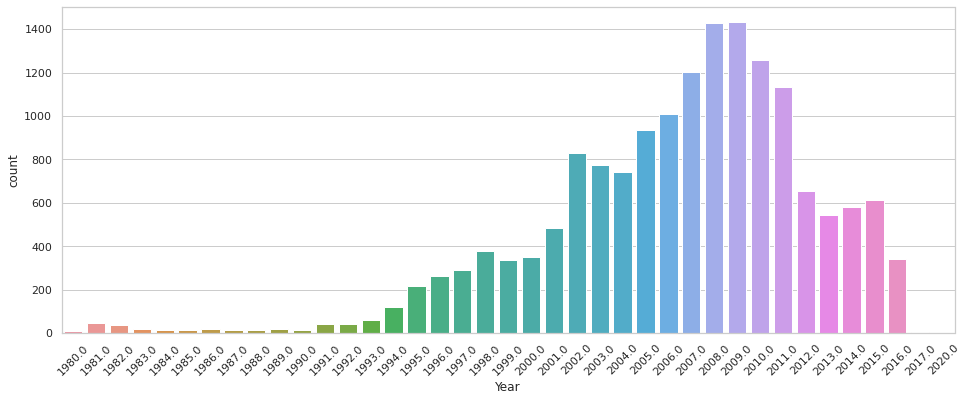

In [10]:
sns.countplot(games.Year)
plt.xticks(rotation=45)

In [11]:
games.query("Year <= 2007").shape[0]/16291, games.query("Year > 2007").shape[0]/ 16291
# до и после 2007 года

(0.5093609968694371, 0.4906390031305629)

In [12]:
year_count = games.Year.value_counts().reset_index()
year_count.columns = ['year', 'cnt']
year_count.head(3)

,year,cnt
0,2009.0,1431
1,2008.0,1428
2,2010.0,1257


Выберите верные утверждения:


- Распределение является нормальным
- **Медиана больше, чем среднее**
- **Мода равна 2009**
- Мода равна 2007
- **Примерно половина игр была выпущена после 2007 года**

### 4. На каких платформах произошло больше всего релизов?

Оставьте названия только тех платформ, частота встречаемости которых составляет более 7%. 
Значения укажите в порядке убывания частоты встречаемости через запятую с пробелом.

In [13]:
games.Platform.value_counts(normalize = True).mul(100).to_frame().query('Platform > 7').index.to_list()

['DS', 'PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS']

### 5. Игры каких издателей (Publisher) встречаются в датасете чаще всего?

В качестве ответа укажите наибольшую абсолютную частоту встречаемости.

In [14]:
games.Publisher.value_counts().max()

1339

In [15]:
# другой способ
ss.mode(games.Publisher)

ModeResult(mode=array(['Electronic Arts'], dtype=object), count=array([1339]))

In [16]:
games.Publisher.describe()

count               16291
unique                576
top       Electronic Arts
freq                 1339
Name: Publisher, dtype: object

### 6. Сфокусируемся на играх от Nintendo. Посчитайте среднее, медиану и стандартное отклонение по продажам игр данного издателя в разных регионах (NA, EU, JP, Other). 

В каком регионе медианное значение объема продаж является наибольшим?


In [17]:
games_nintendo = games.query('Publisher == "Nintendo"')

In [18]:
games_nintendo.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [19]:
games_nintendo[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].median().idxmax()

'NA_Sales'

In [20]:
games_nintendo[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].agg(['mean', 'median', 'std'])

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
mean,1.172055,0.601006,0.653721,0.136767
median,0.375000,0.120000,0.280000,0.030000
std,2.989913,1.743953,1.063110,0.464170


In [21]:
# другой способ
games_nintendo[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,696.000000,696.000000,696.000000,696.000000
mean,1.172055,0.601006,0.653721,0.136767
std,2.989913,1.743953,1.063110,0.464170
min,0.000000,0.000000,0.000000,0.000000
25%,0.010000,0.007500,0.090000,0.000000
50%,0.375000,0.120000,0.280000,0.030000
75%,0.972500,0.482500,0.740000,0.090000
max,41.490000,29.020000,10.220000,8.460000


### 7. Теперь посмотрим на продажи Nintendo в Японии по жанрам. Постройте боксплот, где:

- по оси x будет расположен жанр игры (Genre)
- по оси у – объем продаж в Японии (JP_sales)

Взглянем на получившиеся боксплоты. Что мы можем по ним сказать о данных?


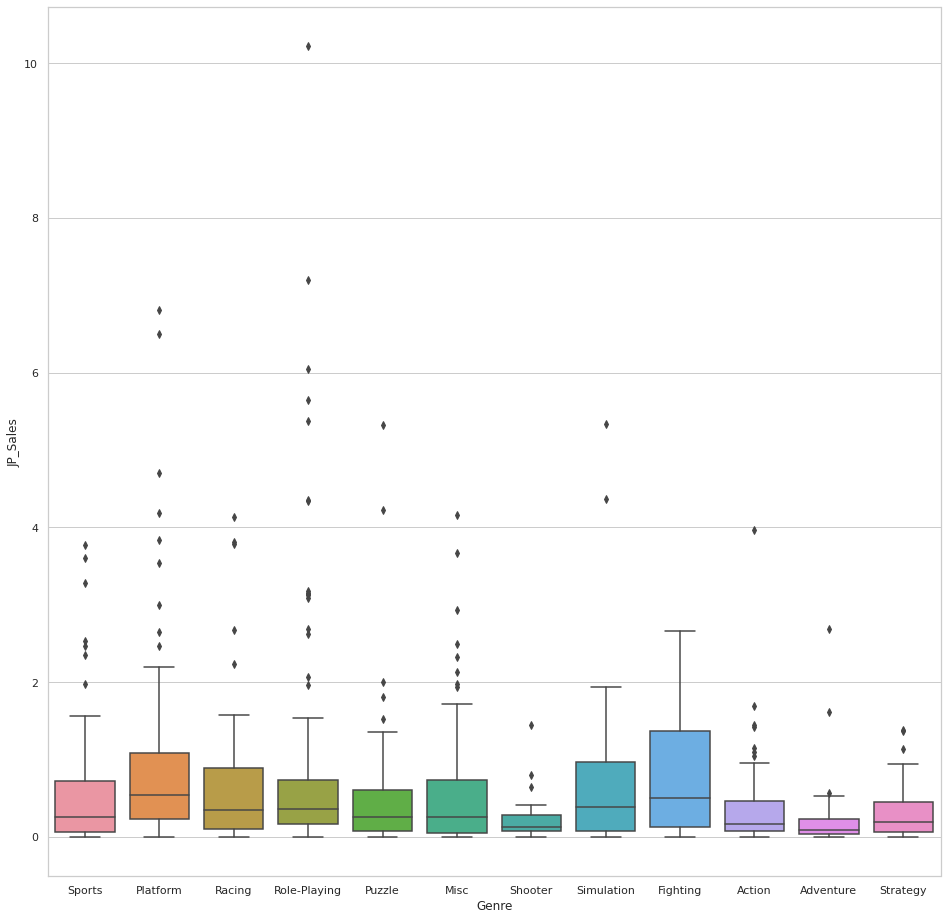

In [22]:
plt.figure(figsize=(16,16))
sns.boxplot(data = games_nintendo, x = 'Genre', y = 'JP_Sales')

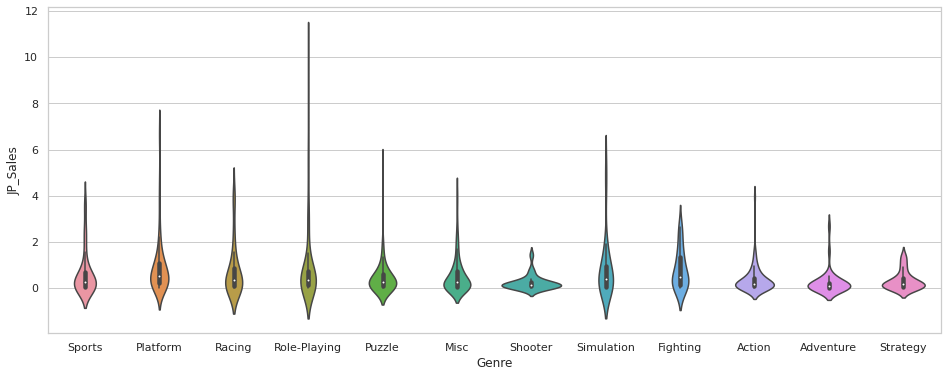

In [23]:
#ещё можно нарисовать скрипки
sns.violinplot(data = games_nintendo, x = 'Genre', y = 'JP_Sales')

/opt/tljh/user/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 16.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 17.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 8.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 31.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 25.7% of the points 

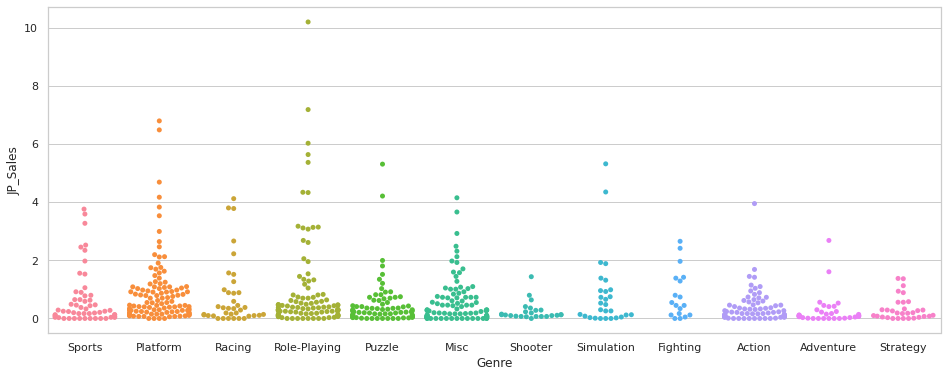

In [24]:
#а также "рой"
sns.swarmplot(data=games_nintendo, x='Genre', y='JP_Sales')

### 8. Визуализируйте динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров:  Fighting, Simulation, Platform, Racing, Sports.

На каком отрезке времени игры жанра Sports были наиболее популярны? 

Иными словами, выберите наименьший отрезок, который включает в себя несколько крупных пиков. 

In [25]:
games_nintendo_genre = games_nintendo.query('Genre == ["Fighting", "Simulation", "Platform", "Racing", "Sports"]') \
    .groupby(['Genre', 'Year']).Global_Sales.sum().reset_index()

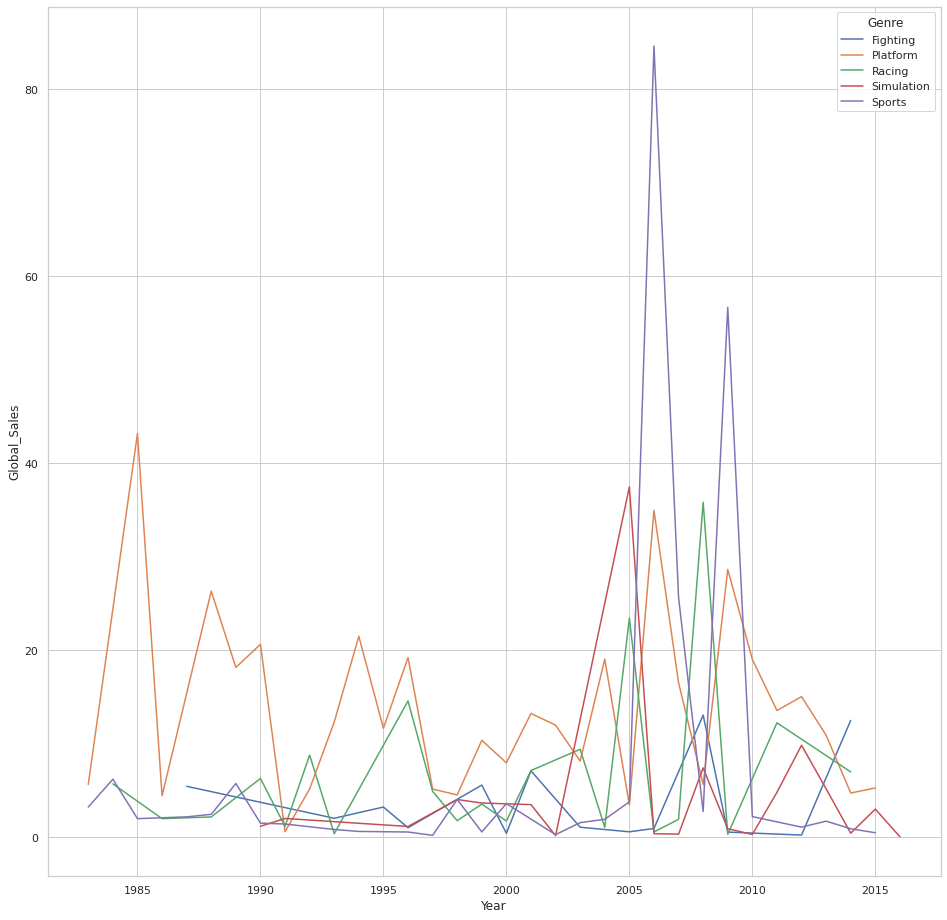

In [26]:
plt.figure(figsize=(16,16))
sns.lineplot(data=games_nintendo_genre, x='Year', y='Global_Sales', hue='Genre') #2005-2010